In [133]:
import matplotlib.pyplot as plt
import pandas as pd
from simulation import GerrymanderingSimulation
import pickle
import geopandas as gpd
import numpy as np
import os
%load_ext autoreload
%autoreload 2

In [22]:
df = pd.read_csv('pop.csv')

<AxesSubplot:>

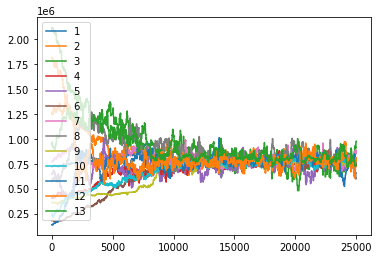

In [23]:
df.plot()

In [24]:
small_df = df[19_999:20_001]

<AxesSubplot:>

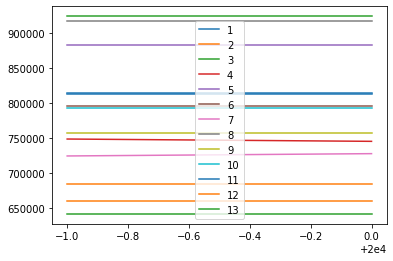

In [25]:
small_df.plot()

In [72]:
center = pd.read_csv('center.csv')
center.reset_index(inplace=True)
center.head()

,index,1,Unnamed: 1
0,1.223608e+08,4.495297e+38,NaN
1,1.223608e+08,4.495297e+38,NaN
2,1.223608e+08,4.495297e+38,NaN
3,1.223608e+08,4.495297e+38,NaN
4,1.221729e+08,3.906907e+38,NaN


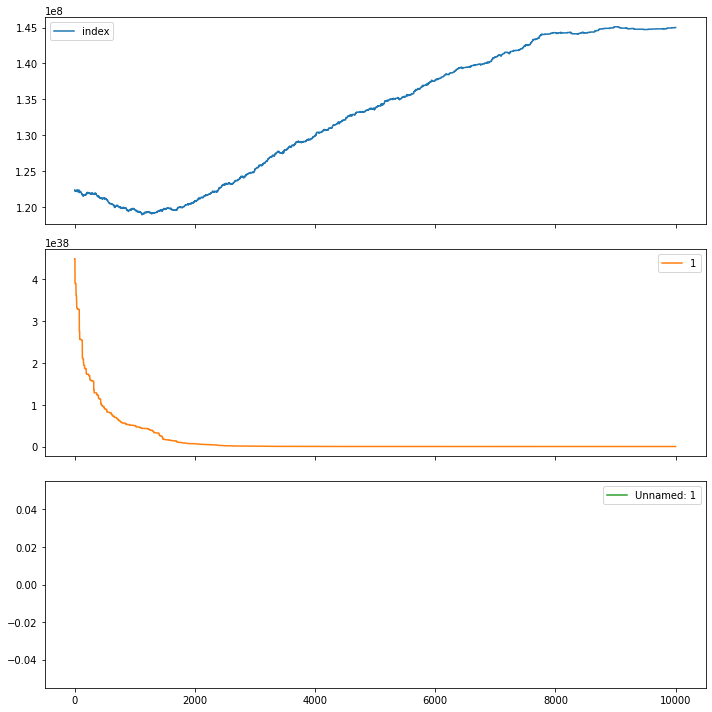

In [134]:
center.plot(subplots=True, figsize=(10,10))
plt.tight_layout()

In [112]:
with open('test_map.pickle', 'rb') as fp:
    pixel_map: gpd.GeoDataFrame = pickle.load(fp)

Centering: 100%|██████████| 10000/10000 [00:49<00:00, 203.88it/s]
Exploring: 0it [00:00, ?it/s]
Electioneering: 0it [00:00, ?it/s]


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

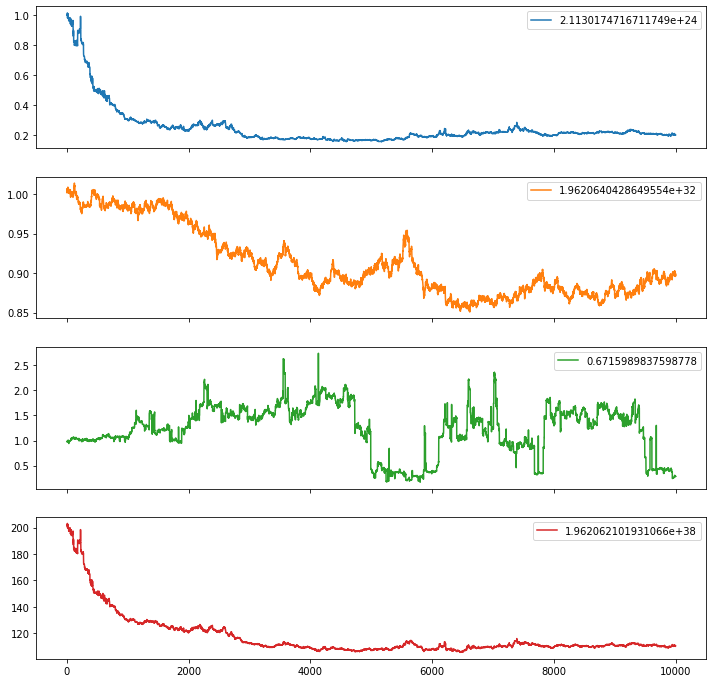

In [166]:
sim = GerrymanderingSimulation(pixel_map, 13)
os.system('rm bugs.csv')
sim.set_desired_results(np.repeat(.6, 13))
sim.initialize_districts()
sim.gerrymander(10000, 0, 0)
bugs = pd.read_csv('bugs.csv')
bugs[1:].plot(subplots=True, figsize=(12,12))

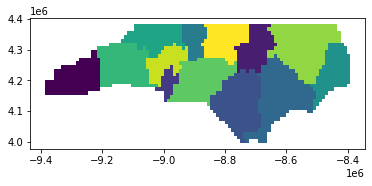

In [167]:
sim.show_districts()

Centering: 0it [00:00, ?it/s]
Exploring: 100%|██████████| 5000/5000 [00:28<00:00, 175.08it/s]
Electioneering: 0it [00:00, ?it/s]


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

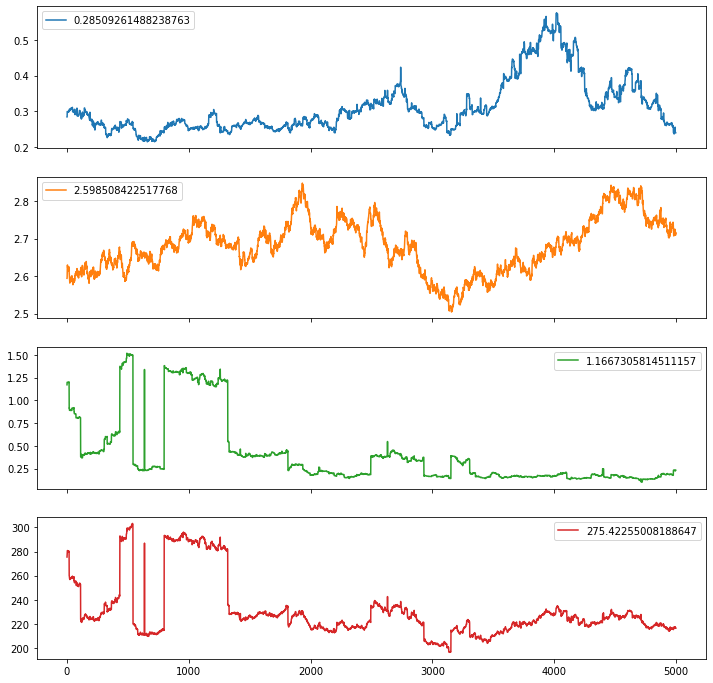

In [174]:
os.system('rm bugs.csv')
sim.gerrymander(0, 5000, 0)
bugs = pd.read_csv('bugs.csv')
bugs[1:].plot(subplots=True, figsize=(12,12))

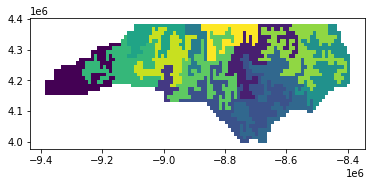

In [176]:
sim.show_districts()

Centering: 0it [00:00, ?it/s]
Exploring: 0it [00:00, ?it/s]
Electioneering: 100%|██████████| 10000/10000 [00:49<00:00, 202.72it/s]


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

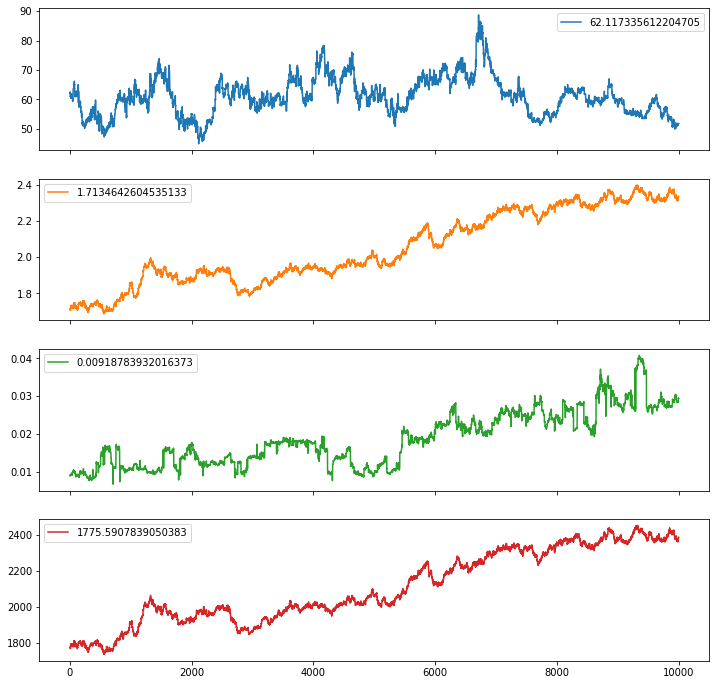

In [208]:
os.system('rm bugs.csv')
sim.gerrymander(0, 0, 10000)
bugs = pd.read_csv('bugs.csv')
bugs[1:].plot(subplots=True, figsize=(12,12))

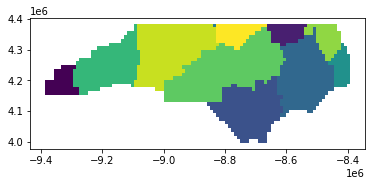

In [209]:
sim.show_districts()

In [210]:
a = [district.election_result for district in sim.districts]
a

[0.7262577205661291,
 0.4100195195309482,
 0.5164348925410872,
 0.5929584124725052,
 0.5984656682734476,
 0.6100706051355278,
 0.5900184304319305,
 0.45425616547334924,
 0.5861820484719863,
 0.4911634409613048,
 0.5775208209491508,
 0.5267974474820094,
 0.4780927743490423]

In [211]:
sum(d > .5 for d in a)

9